<a href="https://colab.research.google.com/github/srini229/EE5333_tutorials/blob/master/intro/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the mip package inside the colab environment
%pip install mip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.17.1
    Uninstalling cffi-1.17.1:
      Successfully uninstalled cffi-1.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygit2 1.16.0 requires cffi>=1.17.0, but you have cffi 1.15.1 which is incompatible.


In [ ]:
# Install the mip package inside the colab environment
%pip install mip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


# <ins>**Set cover problem**</ins>

## Problem definition:
<ul>
$\mathcal{U}$ : Universe = set of elements, $\{0,1,2,\ldots,N-1\}$

$\mathcal{S}$ : collection of subsets of $\mathcal{U}$

$\mathcal{C}$ : set cover is a subset of $\mathcal{S}$ with smallest cardinality whose union is $\mathcal{U}$
</ul>

## Example:
<ul>
$\mathcal{U}=\{0,1,2,3,4\},~\mathcal{S}=\{\{0,1\},\{1,2,3\},\{3,4\},\{0,1,4\}\}$

$\mathcal{C}=\{\{1,2,3\},\{0,1,4\}\}$
</ul>

## ILP formulation
* $x_s$ is an indicator variable for $s\in \mathcal{S}$ being in $\mathcal{C}$; $\small x_s = \begin{cases}0,& i \notin \mathcal{C}\\1,& i \in \mathcal{C}	\end{cases}$

* Objective:
  $\min\limits_{x_s} \sum\limits_{s\in \mathcal{S}}x_s$

* Subject to constraints:

  $\begin{align} \sum\limits_{s:i\in s}x_s &\geq 1,&\forall i \in \mathcal{U}\\
x_s &\in \{0,1\}, &\forall s \in \mathcal{S}
\end{align}$





In [3]:
# N : number of vertices; vertices in {0,1,...(N-1)}
# S : list of tuples
# Return value : set cover as a list of tuples

def findSetCover(N, S):
    import mip
    model = mip.Model("SetCover")
    model.verbose = 0 # turn off Cbc console logs
    x = [model.add_var(var_type=mip.BINARY,\
        name=f"x_{s}") for s in range(len(S))]
    model.objective = mip.minimize(mip.xsum(x))
    occ = [[] for _ in range(N)]
    for i in range(len(S)):
      for j in S[i]: # store the set indices to which i belongs
        occ[j].append(i)
    for xi in occ:
      model += mip.xsum(x[i] for i in xi) >= 1
    model.optimize()
    model.write('set_cover.lp')
    if model.status == mip.OptimizationStatus.OPTIMAL:
        return [S[i] for i in range(len(S)) if x[i].x > 0.9]
    return []


In [4]:
print(findSetCover(5, [(0,1), (1,2,3), (3,4), (0,1,4)]))

[(1, 2, 3), (0, 1, 4)]


In [ ]:
!cat set_cover.lp

\Problem name: SetCover

Minimize
OBJROW: x_0 + x_1 + x_2 + x_3
Subject To
constr(0):  x_0 + x_3 >= 1
constr(1):  x_0 + x_1 + x_3 >= 1
constr(2):  x_1 >= 1
constr(3):  x_1 + x_2 >= 1
constr(4):  x_2 + x_3 >= 1
Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
Integers
x_0 x_1 x_2 x_3 
End


# <ins> **Minimum vertex cover problem** </ins>

* Vertex cover($V'$) : set of vertices that has one end point of every edge
  + $G=(V,E)$
  + $V' \subseteq V:~u \in V' \lor v\in V',~\forall (u,v)\in E$
#### e.g. :
  <img src="https://raw.githubusercontent.com/srini229/EE5333_tutorials/master/intro/fig/vertex_cover.jpg" width=118 height=139 />

    $V'= \left\lbrace 0,2,3,4\right\rbrace$, $\lbrace 1,2,4\rbrace$, $\lbrace 1,2,5\rbrace$




* Minimum vertex cover : minimum valued/sized vertex cover

    e.g. $\lbrace 1,2,4\rbrace$, $\lbrace 1,2,5\rbrace$ </ul>


## ILP formulation :

* $x_v$ is the indicator variable for $v$ being in $V'$; $\small                x_v = \begin{cases} 0,& v\notin V'\\1,& v\in V'\end{cases}$
* Objective: $\min\limits_{x_v} {\sum\limits_{v\in V} x_v}$
* Subject to constraints:
<ul>
$\begin{align}
x_u + x_v &\geq 1,&\forall (u,v)\in E \\x_v &\in \{0,1\},&\forall v\in V
\end{align}$
</ul>

In [ ]:
# N : number of vertices; vertices in {0,1,...(N-1)}
# E : list of edges; edge = unordered pair of vertices
# Return value : minimum vertex cover as list
def findMinVertexCover(N, E):
    import mip
    model = mip.Model("VertexCover")
    model.verbose = 0 # turn off Cbc console logs
    x = [model.add_var(var_type=mip.BINARY,\
        name=f"x_{i}") for i in range(N)]
    model.objective = mip.minimize(mip.xsum(x))
    for e in E:
        model += (x[e[0]] + x[e[1]] >= 1)
    model.optimize()
    model.write("vertex_cover.lp")
    if model.status == mip.OptimizationStatus.OPTIMAL:
        return [i for i in range(N) if x[i].x >= 0.9]
    return []

In [ ]:
print(findMinVertexCover(4,[(0,1),(0,2),(1,2),(1,3)]))
print(findMinVertexCover(6,[(0,1),(1,2),(1,3),(1,4),(2,3),(2,5),(4,5)]))

[0, 1]
[1, 2, 5]


In [ ]:
!cat vertex_cover.lp

\Problem name: VertexCover

Minimize
OBJROW: x_0 + x_1 + x_2 + x_3 + x_4 + x_5
Subject To
constr(0):  x_0 + x_1 >= 1
constr(1):  x_1 + x_2 >= 1
constr(2):  x_1 + x_3 >= 1
constr(3):  x_1 + x_4 >= 1
constr(4):  x_2 + x_3 >= 1
constr(5):  x_2 + x_5 >= 1
constr(6):  x_4 + x_5 >= 1
Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1
Integers
x_0 x_1 x_2 x_3 x_4 x_5 
End


# <ins> **Graph coloring** </ins>

* Given a graph $G=(V,E)$ and $C$ colors, color each vertex in graph such that no two same color vertices are adjacent
##### e.g. three coloring
<img src=https://raw.githubusercontent.com/srini229/EE5333_tutorials/master/intro/fig/color_graph.jpg width=118 height=139 />

* Weighted coloring : each color $c_i$ has a cost $w_i$; Reduce the overall cost.


## ILP formulation

* $x_{v,i}$ is the indicator variable for vertex $v$ being colored $i$, $\small x_{v,i} = \begin{cases}0,& v~\text{is not } i~\text{colored} \\1,& v~\text{is } i~\text{colored}\end{cases}$
* Objective: $\min\limits_{x_{v,i}} \sum\limits_{v\in V}\sum\limits_{i=0}^{C-1}w_i\cdot x_{v,i}$
* Subject to constraints:

  $\begin{align}
  \sum_{i=0}^{C-1} x_{v,i}&= 1, &\forall v \in V\\
  x_{u, i} + x_{v,i} &\leq 1, &\forall i \in \{0,1,\ldots,C-1\}, (u,v) \in E\\
  x_{v,i} &\in\{0,1\},&\forall i \in \{0,1,\ldots,C-1\}, v\in V
  \end{align}$

In [ ]:
# N is num. vertices; vertices are indexed {0,1,...,(N-1)}
# E is a list of edges; each edge is an unordered pair of vertices
# C is list of color costs : C[i] is the cost of color i
#                            color ranges from [0,1,...,len(C)-1]
# Return value : list of colors if colorable empty list otherwise;
#                ith color in the list is for the ith vertex
def colorGraph(N, E, C):
  return []

In [ ]:
print(colorGraph(6, [(0,1), (1,2), (1,3), (1,4), (2,3), (2,5), (1,4), (4,5)], [1,2,1]))
# one potential solution is  [0,2,0,1,0,2]

[0, 2, 0, 1, 0, 2]


In [ ]:
print(colorGraph(6, [(0,1), (1,2), (1,3), (1,4), (2,3), (2,5), (1,4), (4,5)], [1,2,1]))

None


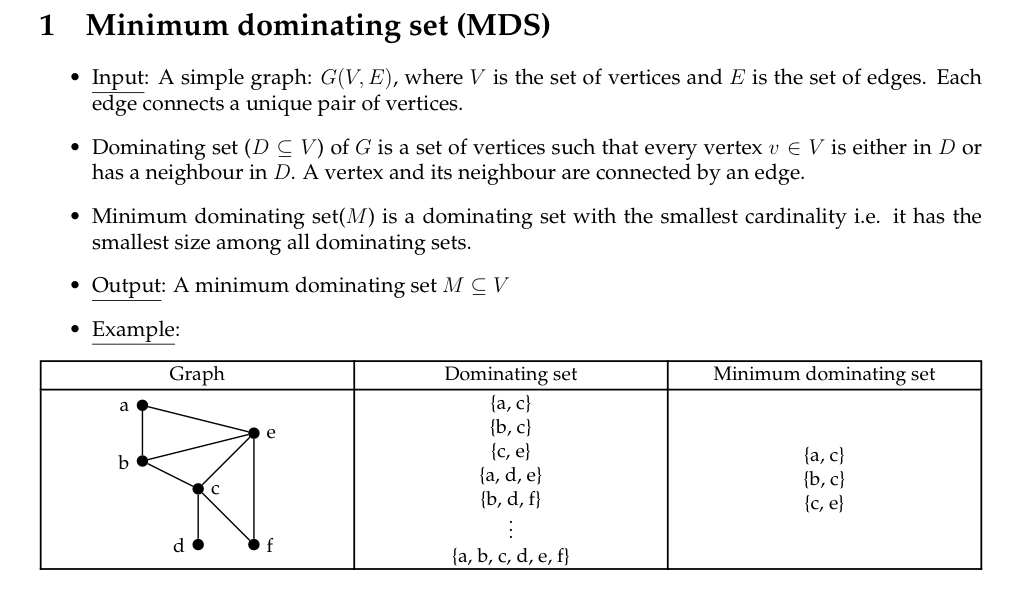

In [ ]:
# N is num. vertices; vertices are indexed {0,1,...,(N-1)}
# E is a list of edges; each edge is an unordered pair of vertices
# Return value : list of vertices that constitute the MDS
def mds(N, E):
  return ()

In [ ]:
print(mwis(6, [(0,1), (1,2), (1,3), (1,4), (2,3), (2,5), (1,4), (4,5)], [1,2,1]))

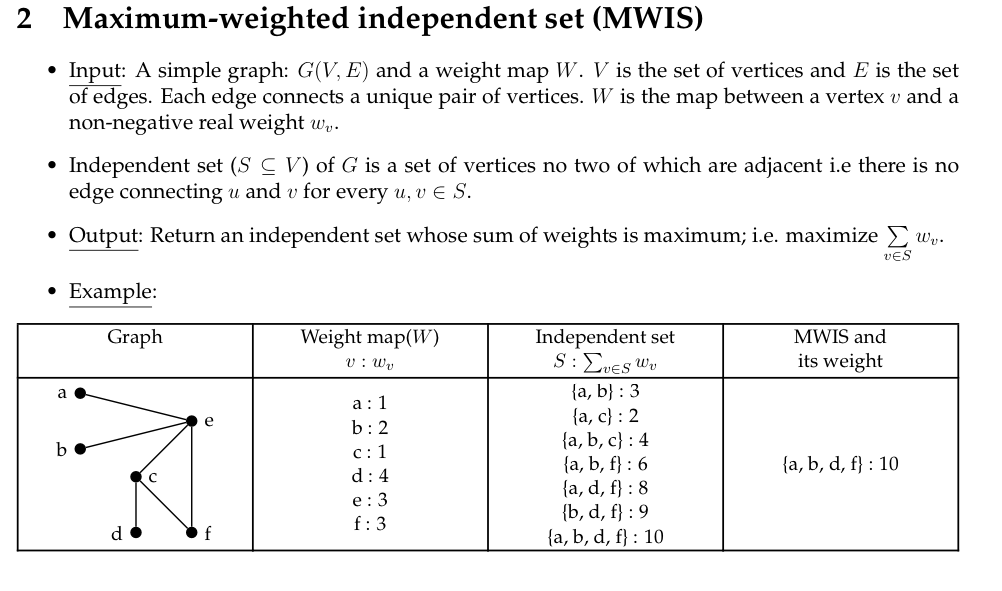

In [ ]:
# N is num. vertices; vertices are indexed {0,1,...,(N-1)}
# E is a list of edges; each edge is an unordered pair of vertices
# W is list of weights : w[i] is the weight of vertex i
# Return value : (list of vertices that constitute the MWIS, weight of MWIS)
def mwis(N, E, W):
  return ()

In [ ]:
print(mwis(6, [(0,1), (1,2), (1,3), (1,4), (2,3), (2,5), (1,4), (4,5)], [1,2,1]), [1,2,1,4,3,3])